In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19)
image = np.random.rand(8, 8)

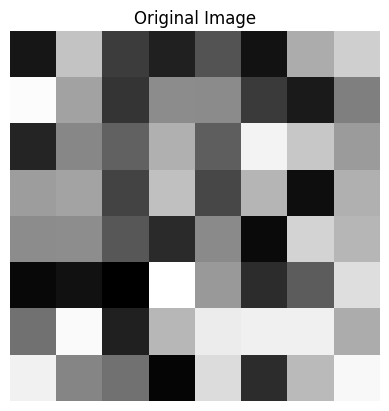

In [10]:
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

## Discrete Costine Transform (DCT) matrix
$$ X_k = \sqrt{\frac{2}{n}} \cdot \cos\left( \frac{2\pi \cdot (2k+1)}{n} \right) $$


In [11]:
def dct_matrix(n: np.ndarray):
    dct_matrix = np.zeros((n, n))
    for k in range(n):
        for i in range(n):
            dct_matrix[k, i] = np.sqrt(2 / n) * np.cos(
                np.pi * (2 * i + 1) * k / (2 * n)
            )
    # normalize the first row (scaling factor) as per DCT definition
    dct_matrix[0] /= np.sqrt(2)
    return dct_matrix

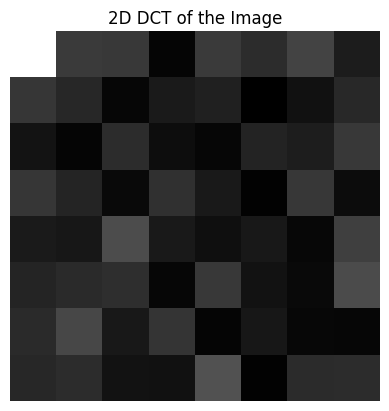

In [12]:
n = image.shape[0]
dct_transform = dct_matrix(n)
# get 2D DCT
dct_forward = np.dot(dct_transform, np.dot(image, dct_transform.T))
plt.imshow(
    np.log(np.abs(dct_forward) + 1), cmap="gray"
)  # Log scale for better visualization
plt.title("2D DCT of the Image")
plt.axis("off")
plt.show()

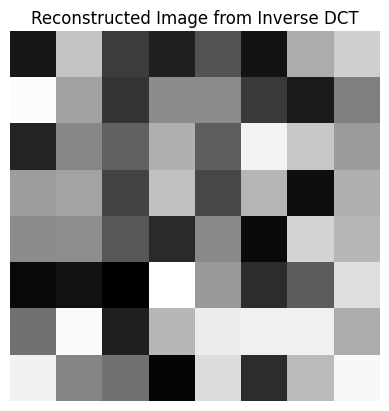

In [13]:
# inverse DCT
dct_inverse = np.dot(
    np.linalg.inv(dct_transform), np.dot(dct_forward, np.linalg.inv(dct_transform.T))
)
# Inverse DCT(reconstructed img)
plt.imshow(dct_inverse, cmap="gray")
plt.title("Reconstructed Image from Inverse DCT")
plt.axis("off")
plt.show()

In [ ]:
def compute_dct_basis(size: int):
    """
    Compute the DCT basis images.

    Args:
        size (int): The size of the DCT basis images (size x size).

    Returns:
        np.ndarray: An array containing the basis images of shape (size, size, size, size).
    """
    dct_transform = dct_matrix(size)
    basis_images = np.zeros((size, size, size, size))

    for u in range(size):
        for v in range(size):
            # out product of the u-th and v-th DCT basis vectors
            basis_images[u, v] = np.outer(dct_transform[u], dct_transform[v])

    return basis_images

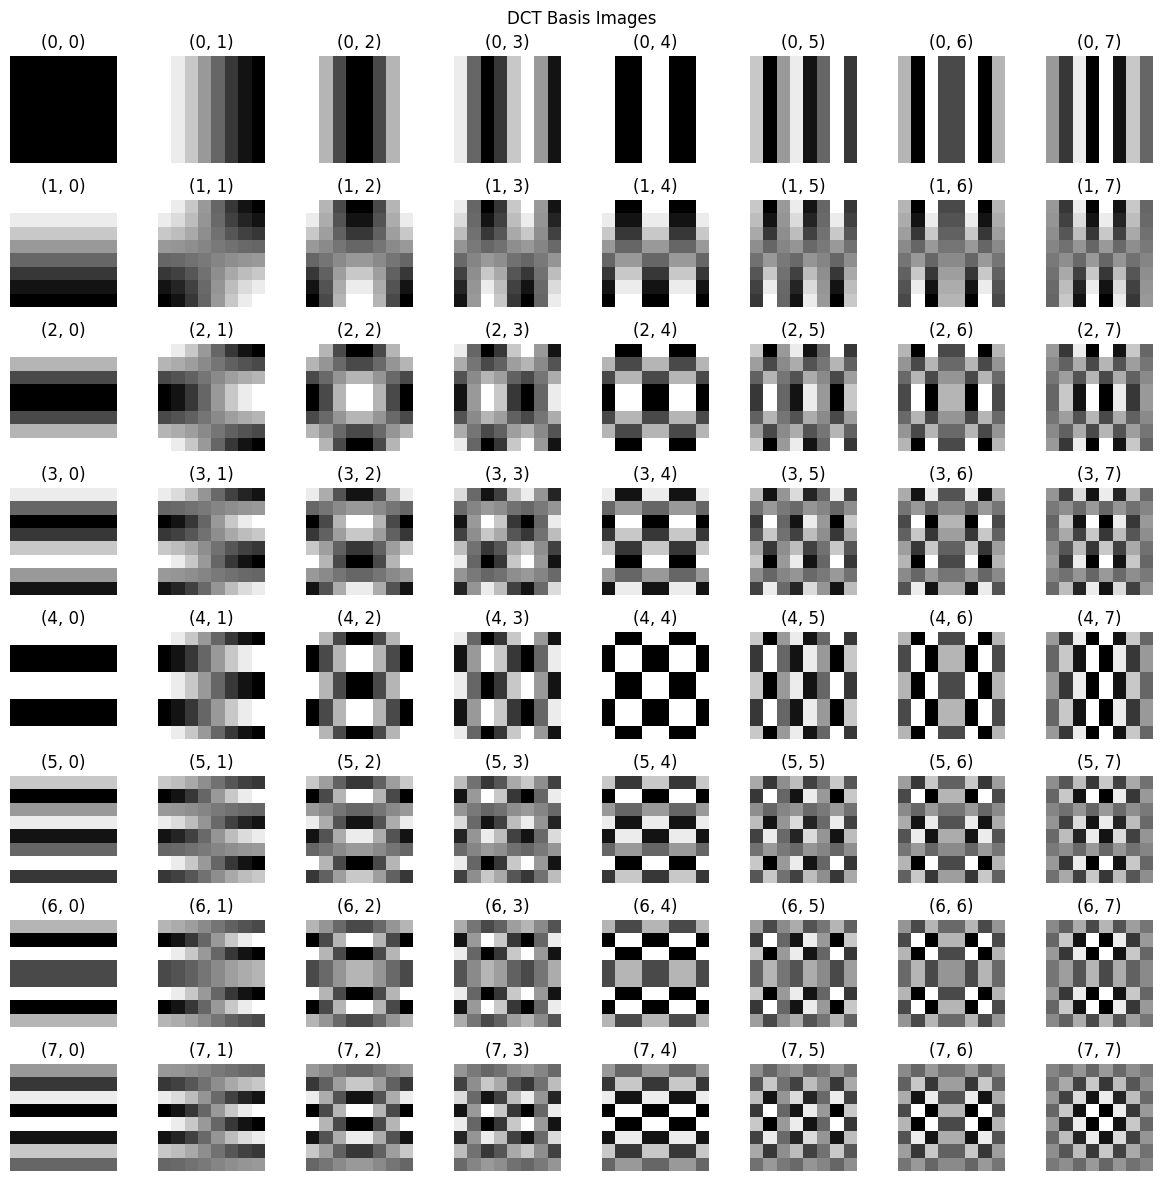

In [15]:
# DCT basis images
size = 8
basis_images = compute_dct_basis(size)

fig, axes = plt.subplots(size, size, figsize=(12, 12))
for u in range(size):
    for v in range(size):
        axes[u, v].imshow(basis_images[u, v], cmap="gray")
        axes[u, v].axis("off")
        axes[u, v].set_title(f"({u}, {v})")
plt.suptitle("DCT Basis Images")
plt.tight_layout()
plt.show()

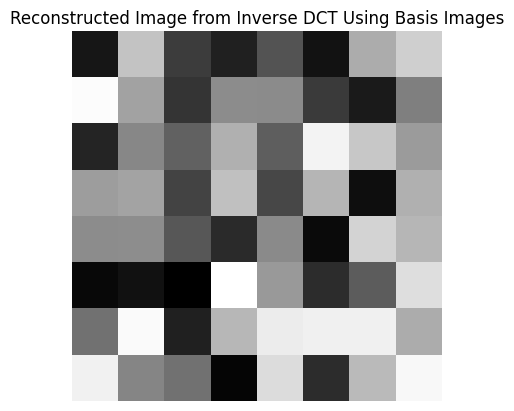

In [16]:
def inverse_dct_with_basis(dct_coefficients: np.ndarray, basis_images: np.ndarray):
    """
    Compute the 2D inverse DCT using the basis images.

    Args:
        dct_coefficients (np.ndarray): The DCT coefficients of the image (size x size).
        basis_images (np.ndarray): The DCT basis images (size, size, size, size).

    Returns:
        np.ndarray: The reconstructed image.
    """
    size = dct_coefficients.shape[0]
    reconstructed_image = np.zeros((size, size))
    for u in range(size):
        for v in range(size):
            reconstructed_image += dct_coefficients[u, v] * basis_images[u, v]
    return reconstructed_image


#  inverse DCT using basis images
reconstructed_image = inverse_dct_with_basis(dct_forward, basis_images)

plt.imshow(reconstructed_image, cmap="gray")
plt.title("Reconstructed Image from Inverse DCT Using Basis Images")
plt.axis("off")
plt.show()

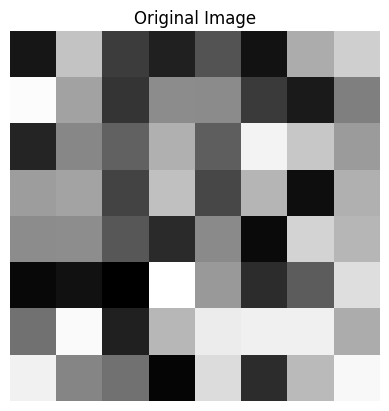

In [17]:
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()